In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '7d300182-560c-4343-adb7-56f41c7145ef',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2023-04-28T10:12:25.690Z', 'error_code': 0, 'error_message': None, 'elapsed': 38, 'credit_count': 1, 'notice': None, 'total_count': 9429}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10195, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10195,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.935841e+07,1.935841e+07,False,NaN,1,NaN,NaN,None,2023-04-28T10:11:00.000Z,29200.609714,2.261757e+10,-34.4516,-0.001744,0.850722,4.072858,2.970528,24.813251,26.886517,5.652773e+11,47.0019,6.132128e+11,None,2023-04-28T10:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 10:12:28.022041
1,1027,Ethereum,ETH,ethereum,6794,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204005e+08,1.204005e+08,False,NaN,2,NaN,NaN,None,2023-04-28T10:11:00.000Z,1907.477344,1.120614e+10,-32.3442,0.056231,1.193730,-0.742032,5.116554,16.502516,19.822761,2.296612e+11,19.0961,2.296612e+11,None,2023-04-28T10:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 10:12:28.022041
2,825,Tether,USDT,tether,52229,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.161554e+10,8.509064e+10,False,NaN,3,NaN,NaN,None,2023-04-28T10:11:00.000Z,1.000453,2.998528e+10,-37.0330,0.008589,0.026998,0.040550,0.047890,0.036822,0.020819,8.165254e+10,6.7887,8.512922e+10,None,2023-04-28T10:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-28 10:12:28.022041
3,1839,BNB,BNB,bnb,1296,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558632e+08,1.558632e+08,False,NaN,4,NaN,NaN,None,2023-04-28T10:11:00.000Z,320.472664,9.031465e+08,-4.9704,-0.271215,-3.047388,-2.726800,0.847499,5.106435,3.913018,4.994989e+10,4.1533,4.994989e+10,None,2023-04-28T10:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 10:12:28.022041
4,3408,USD Coin,USDC,usd-coin,12070,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.053090e+10,3.053090e+10,False,NaN,5,NaN,NaN,None,2023-04-28T10:11:00.000Z,1.000007,4.410773e+09,-39.0980,0.009788,0.004410,-0.003763,0.037593,0.008660,0.003071,3.053110e+10,2.5384,3.053110e+10,None,2023-04-28T10:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-28 10:12:28.022041
5,52,XRP,XRP,xrp,938,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.175081e+10,9.998900e+10,False,NaN,6,NaN,NaN,None,2023-04-28T10:11:00.000Z,0.470941,1.670514e+09,2.4426,-0.211478,2.737215,-0.131344,-17.082400,26.140398,14.558698,2.437159e+10,2.0255,4.709412e+10,None,2023-04-28T10:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 10:12:28.022041
6,2010,Cardano,ADA,cardano,773,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.480201e+10,3.572784e+10,False,NaN,7,NaN,NaN,None,2023-04-28T10:11:00.000Z,0.405736,3.225676e+08,-40.6738,-0.085500,-0.063657,0.218235,4.555047,12.025981,4.820849,1.412042e+10,1.1735,1.825811e+10,None,2023-04-28T10:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 10:12:28.022041
7,74,Dogecoin,DOGE,dogecoin,697,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.391233e+11,1.391233e+11,False,NaN,8,NaN,NaN,None,2023-04-28T10:11:00.000Z,0.080180,3.211055e+08,-59.2255,0.159710,0.759518,-4.705487,5.291006,-1.070136,-10.777158,1.115494e+10,0.9275,1.115494e+10,None,2023-04-28T10:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 10:12:28.022041
8,3890,Polygon,MATIC,polygon,674,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+1

In [5]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '7d300182-560c-4343-adb7-56f41c7145ef',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    if not os.path.isfile(r'C:\PythonScripts\API.csv'):
        df.to_csv(r'C:\PythonScripts\API.csv',header='column_names')
    else:
         df.to_csv(r'C:\PythonScripts\API.csv', mode='a', header=False)
        


In [6]:
import os
from time import time
from time import  sleep

for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed


KeyboardInterrupt: 

In [7]:
df3 = pd.read_csv(r'C:\PythonScripts\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10189,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.935690e+07,1.935690e+07,False,NaN,1,NaN,NaN,NaN,2023-04-26T16:52:00.000Z,29760.672009,2.642844e+10,74.4294,-0.194394,8.634765,1.418620,9.698414,29.132165,29.304396,5.760744e+11,46.9169,6.249741e+11,NaN,2023-04-26T16:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-26 16:53:58.710661
1,1,1027,Ethereum,ETH,ethereum,6786,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204048e+08,1.204048e+08,False,NaN,2,NaN,NaN,NaN,2023-04-26T16:52:00.000Z,1950.290502,1.149207e+10,43.2349,-0.140387,7.057312,-1.714569,13.583829,22.026464,22.333658,2.348243e+11,19.1291,2.348243e+11,NaN,2023-04-26T16:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-26 16:53:58.710661
2,2,825,Tether,USDT,tether,51978,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.157684e+10,8.509064e+10,False,NaN,3,NaN,NaN,NaN,2023-04-26T16:52:00.000Z,1.000130,3.505460e+10,52.3323,0.005771,0.018123,-0.063653,0.000251,0.003298,0.000493,8.158748e+10,6.6456,8.510173e+10,NaN,2023-04-26T16:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-26 16:53:58.710661
3,3,1839,BNB,BNB,bnb,1289,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558636e+08,1.558636e+08,False,NaN,4,NaN,NaN,NaN,2023-04-26T16:52:00.000Z,342.122607,8.024804e+08,28.3028,-0.074769,3.045543,4.442221,9.711135,13.362076,12.242303,5.332445e+10,4.3425,5.332445e+10,NaN,2023-04-26T16:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-26 16:53:58.710661
4,4,3408,USD Coin,USDC,usd-coin,12025,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.070861e+10,3.070861e+10,False,NaN,5,NaN,NaN,NaN,2023-04-26T16:52:00.000Z,1.000189,5.807124e+09,33.5271,0.015127,0.025361,0.005120,0.069154,0.025815,0.019981,3.071440e+10,2.5018,3.071440e+10,NaN,2023-04-26T16:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-26 16:53:58.710661
5,5,52,XRP,XRP,xrp,937,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.175081e+10,9.998900e+10,False,NaN,6,NaN,NaN,NaN,2023-04-26T16:52:00.000Z,0.476646,1.242902e+09,16.8918,-0.184197,4.638271,-4.186246,3.569833,26.087051,16.438061,2.466681e+10,2.0088,4.766459e+10,NaN,2023-04-26T16:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-26 16:53:58.710661
6,6,2010,Cardano,ADA,cardano,771,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.479974e+10,3.572784e+10,False,NaN,7,NaN,NaN,NaN,2023-04-26T16:52:00.000Z,0.413923,3.616899e+08,39.8524,-0.305705,8.439830,-1.963922,20.333229,13.419908,9.318159,1.440442e+10,1.1734,1.862654e+10,NaN,2023-04-26T16:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-26 16:53:58.710661
7,7,74,Dogecoin,DOGE,dogecoin,696,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.390995e+11,1.390995e+11,False,NaN,8,NaN,NaN,NaN,2023-04-26T16:52:00.000Z,0.082439,4.693098e+08,40.2004,-0.333473,5.439144,-9.042113,13.575622,1.309701,-4.092065,1.146729e+10,0.9341,1.146729e+10,NaN,2023-04-26T16:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-26 16:53:58.710661
8,8,3890,Polygon,MATIC,polygon,671,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'zero-kno...",1.

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10195,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.935841e+07,1.935841e+07,False,NaN,1,NaN,NaN,None,2023-04-28T10:11:00.000Z,29200.609714,2.261757e+10,-34.4516,-0.001744,0.850722,4.072858,2.970528,24.813251,26.886517,5.652773e+11,47.0019,6.132128e+11,None,2023-04-28T10:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 10:12:28.022041
1,1027,Ethereum,ETH,ethereum,6794,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204005e+08,1.204005e+08,False,NaN,2,NaN,NaN,None,2023-04-28T10:11:00.000Z,1907.477344,1.120614e+10,-32.3442,0.056231,1.193730,-0.742032,5.116554,16.502516,19.822761,2.296612e+11,19.0961,2.296612e+11,None,2023-04-28T10:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 10:12:28.022041
2,825,Tether,USDT,tether,52229,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.161554e+10,8.509064e+10,False,NaN,3,NaN,NaN,None,2023-04-28T10:11:00.000Z,1.000453,2.998528e+10,-37.0330,0.008589,0.026998,0.040550,0.047890,0.036822,0.020819,8.165254e+10,6.7887,8.512922e+10,None,2023-04-28T10:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-28 10:12:28.022041
3,1839,BNB,BNB,bnb,1296,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558632e+08,1.558632e+08,False,NaN,4,NaN,NaN,None,2023-04-28T10:11:00.000Z,320.472664,9.031465e+08,-4.9704,-0.271215,-3.047388,-2.726800,0.847499,5.106435,3.913018,4.994989e+10,4.1533,4.994989e+10,None,2023-04-28T10:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 10:12:28.022041
4,3408,USD Coin,USDC,usd-coin,12070,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.053090e+10,3.053090e+10,False,NaN,5,NaN,NaN,None,2023-04-28T10:11:00.000Z,1.000007,4.410773e+09,-39.0980,0.009788,0.004410,-0.003763,0.037593,0.008660,0.003071,3.053110e+10,2.5384,3.053110e+10,None,2023-04-28T10:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-28 10:12:28.022041
5,52,XRP,XRP,xrp,938,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.175081e+10,9.998900e+10,False,NaN,6,NaN,NaN,None,2023-04-28T10:11:00.000Z,0.470941,1.670514e+09,2.4426,-0.211478,2.737215,-0.131344,-17.082400,26.140398,14.558698,2.437159e+10,2.0255,4.709412e+10,None,2023-04-28T10:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 10:12:28.022041
6,2010,Cardano,ADA,cardano,773,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.480201e+10,3.572784e+10,False,NaN,7,NaN,NaN,None,2023-04-28T10:11:00.000Z,0.405736,3.225676e+08,-40.6738,-0.085500,-0.063657,0.218235,4.555047,12.025981,4.820849,1.412042e+10,1.1735,1.825811e+10,None,2023-04-28T10:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 10:12:28.022041
7,74,Dogecoin,DOGE,dogecoin,697,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.391233e+11,1.391233e+11,False,NaN,8,NaN,NaN,None,2023-04-28T10:11:00.000Z,0.080180,3.211055e+08,-59.2255,0.159710,0.759518,-4.705487,5.291006,-1.070136,-10.777158,1.115494e+10,0.9275,1.115494e+10,None,2023-04-28T10:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 10:12:28.022041
8,3890,Polygon,MATIC,polygon,674,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+1

In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10195,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19358406.00000,19358406.00000,False,NaN,1,NaN,NaN,None,2023-04-28T10:11:00.000Z,29200.60971,22617570106.30652,-34.45160,-0.00174,0.85072,4.07286,2.97053,24.81325,26.88652,565277258299.36475,47.00190,613212804002.90002,None,2023-04-28T10:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 10:12:28.022041
1,1027,Ethereum,ETH,ethereum,6794,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120400464.26664,120400464.26664,False,NaN,2,NaN,NaN,None,2023-04-28T10:11:00.000Z,1907.47734,11206135866.11497,-32.34420,0.05623,1.19373,-0.74203,5.11655,16.50252,19.82276,229661157780.77264,19.09610,229661157780.76999,None,2023-04-28T10:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 10:12:28.022041
2,825,Tether,USDT,tether,52229,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,81615536097.75209,85090638896.27086,False,NaN,3,NaN,NaN,None,2023-04-28T10:11:00.000Z,1.00045,29985281405.16503,-37.03300,0.00859,0.02700,0.04055,0.04789,0.03682,0.02082,81652538143.95648,6.78870,85129216450.28000,None,2023-04-28T10:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-28 10:12:28.022041
3,1839,BNB,BNB,bnb,1296,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155863174.18031,155863174.18031,False,NaN,4,NaN,NaN,None,2023-04-28T10:11:00.000Z,320.47266,903146532.48671,-4.97040,-0.27122,-3.04739,-2.72680,0.84750,5.10644,3.91302,49949886672.21822,4.15330,49949886672.22000,None,2023-04-28T10:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 10:12:28.022041
4,3408,USD Coin,USDC,usd-coin,12070,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,30530898007.31739,30530898007.31739,False,NaN,5,NaN,NaN,None,2023-04-28T10:11:00.000Z,1.00001,4410772909.71498,-39.09800,0.00979,0.00441,-0.00376,0.03759,0.00866,0.00307,30531097085.77996,2.53840,30531097085.78000,None,2023-04-28T10:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-28 10:12:28.022041
5,52,XRP,XRP,xrp,938,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51750810378.00000,99988998998.00000,False,NaN,6,NaN,NaN,None,2023-04-28T10:11:00.000Z,0.47094,1670514315.80039,2.44260,-0.21148,2.73721,-0.13134,-17.08240,26.14040,14.55870,24371589911.26588,2.02550,47094122262.53000,None,2023-04-28T10:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 10:12:28.022041
6,2010,Cardano,ADA,cardano,773,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34802010144.83700,35727842284.50800,False,NaN,7,NaN,NaN,None,2023-04-28T10:11:00.000Z,0.40574,322567649.07111,-40.67380,-0.08550,-0.06366,0.21823,4.55505,12.02598,4.82085,14120421695.67958,1.17350,18258111346.47000,None,2023-04-28T10:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 10:12:28.022041
7,74,Dogecoin,DOGE,dogecoin,697,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139123256383.70520,139123256383.70520,False,NaN,8,NaN,NaN,None,2023-04-28T10:11:00.000Z,0.08018,321105464.33047,-59.22550,0.15971,0.75952,-4.70549,5.29101,-1.07014,-10.77716,11154944706.76933,0.92750,11154944706.77000,None,2023-04-28T10:11:00.000Z,NaN

In [11]:
df4 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.00174,0.85072,4.07286,2.97053,24.81325,26.88652
Ethereum,0.05623,1.19373,-0.74203,5.11655,16.50252,19.82276
Tether,0.00859,0.02700,0.04055,0.04789,0.03682,0.02082
BNB,-0.27122,-3.04739,-2.72680,0.84750,5.10644,3.91302
USD Coin,0.00979,0.00441,-0.00376,0.03759,0.00866,0.00307
XRP,-0.21148,2.73721,-0.13134,-17.08240,26.14040,14.55870
Cardano,-0.08550,-0.06366,0.21823,4.55505,12.02598,4.82085
Dogecoin,0.15971,0.75952,-4.70549,5.29101,-1.07014,-10.77716
Polygon,-0.26676,1.02912,-4.47162,-12.35528,-19.91364,-11.92581


In [13]:
df5 = df4.stack()
df5

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.00174
             quote.USD.percent_change_24h     0.85072
             quote.USD.percent_change_7d      4.07286
             quote.USD.percent_change_30d     2.97053
             quote.USD.percent_change_60d    24.81325
             quote.USD.percent_change_90d    26.88652
Ethereum     quote.USD.percent_change_1h      0.05623
             quote.USD.percent_change_24h     1.19373
             quote.USD.percent_change_7d     -0.74203
             quote.USD.percent_change_30d     5.11655
             quote.USD.percent_change_60d    16.50252
             quote.USD.percent_change_90d    19.82276
Tether       quote.USD.percent_change_1h      0.00859
             quote.USD.percent_change_24h     0.02700
             quote.USD.percent_change_7d      0.04055
             quote.USD.percent_change_30d     0.04789
             quote.USD.percent_change_60d     0.03682
             quote.USD.percent_change_90

In [25]:
type(df5)

pandas.core.series.Series

In [15]:
df6 = df5.to_frame(name='values')
df6

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.00174
            quote.USD.percent_change_24h   0.85072
            quote.USD.percent_change_7d    4.07286
            quote.USD.percent_change_30d   2.97053
            quote.USD.percent_change_60d  24.81325
            quote.USD.percent_change_90d  26.88652
Ethereum    quote.USD.percent_change_1h    0.05623
            quote.USD.percent_change_24h   1.19373
            quote.USD.percent_change_7d   -0.74203
            quote.USD.percent_change_30d   5.11655
            quote.USD.percent_change_60d  16.50252
            quote.USD.percent_change_90d  19.82276
Tether      quote.USD.percent_change_1h    0.00859
            quote.USD.percent_change_24h   0.02700
            quote.USD.percent_change_7d    0.04055
            quote.USD.percent_change_30d   0.04789
            quote.USD.percent_change_60d   0.03682
            quote.USD.percent_change_90d   0.02082
BNB         quote.USD.percent_change_1h   -0.27122
            quote.USD.percent_change_24h  -3.04739
            quote.USD.percent_change_7d   -2.72680
            quote.USD.percent_change_30d   0.84750
            quote.USD.percent_change_60d   5.10644
            quote.USD.percent_change_90d   3.91302
USD Coin    quote.USD.percent_change_1h    0.00979
            quote.USD.percent_change_24h   0.00441
            quote.USD.percent_change_7d   -0.00376
            quote.USD.percent_change_30d   0.03759
            quote.USD.percent_change_60d   0.00866
            quote.USD.percent_change_90d   0.00307
XRP         quote.USD.percent_change_1h   -0.21148
            quote.USD.percent_change_24h   2.73721
            quote.USD.percent_change_7d   -0.13134
            quote.USD.percent_change_30d -17.08240
            quote.USD.percent_change_60d  26.14040
            quote.USD.percent_change_90d  14.55870
Cardano     quote.USD.percent_change_1h   -0.08550
            quote.USD.percent_change_24h  -0.06366
            quote.USD.percent_change_7d    0.21823
            quote.USD.percent_change_30d   4.55505
            quote.USD.percent_change_60d  12.02598
            quote.USD.percent_change_90d   4.82085
Dogecoin    quote.USD.percent_change_1h    0.15971
            quote.USD.percent_change_24h   0.75952
            quote.USD.percent_change_7d   -4.70549
            quote.USD.percent_change_30d   5.29101
            quote.USD.percent_change_60d  -1.07014
            quote.USD.percent_change_90d -10.77716
Polygon     quote.USD.percent_change_1h   -0.26676
            quote.USD.percent_change_24h   1.02912
            quote.USD.percent_change_7d   -4.47162
            quote.USD.percent_change_30d -12.35528
            quote.USD.percent_change_60d -19.91364
            quote.USD.percent_change_90d -11.92581
Solana      quote.USD.percent_change_1h   -0.04688
            quote.USD.percent_change_24h   3.74031
            quote.USD.percent_change_7d    0.79266
            quote.USD.percent_change_30d   5.62928
            quote.USD.percent_change_60d  -1.60994
            quote.USD.percent_change_90d  -8.17699
Polkadot    quote.USD.percent_change_1h   -0.06336
            quote.USD.percent_change_24h  -0.35666
            quote.USD.percent_change_7d   -3.44083
            quote.USD.percent_change_30d  -6.03338
            quote.USD.percent_change_60d -10.74657
            quote.USD.percent_change_90d  -9.76472
Litecoin    quote.USD.percent_change_1h    0.09005
            quote.USD.percent_change_24h   1.34924
            quote.USD.percent_change_7d   -1.01389
            quote.USD.percent_change_30d  -2.78743
            quote.USD.percent_change_60d  -5.03238
            quote.USD.percent_change_90d   1.03449
Binance USD quote.USD.percent_change_1h   -0.01009
            quote.USD.percent_change_24h  -0.00244
            quote.USD.percent_change_7d    0.01011
            quote.USD.percent_change_30d   0.03238
            quote.USD.percent_change_60d  -0.02108
            quo

In [16]:
df6.count()

values    90
dtype: int64

In [17]:
index = pd.Index(range(90))

df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.00174
1,Bitcoin,quote.USD.percent_change_24h,0.85072
2,Bitcoin,quote.USD.percent_change_7d,4.07286
3,Bitcoin,quote.USD.percent_change_30d,2.97053
4,Bitcoin,quote.USD.percent_change_60d,24.81325
5,Bitcoin,quote.USD.percent_change_90d,26.88652
6,Ethereum,quote.USD.percent_change_1h,0.05623
7,Ethereum,quote.USD.percent_change_24h,1.19373
8,Ethereum,quote.USD.percent_change_7d,-0.74203
9,Ethereum,quote.USD.percent_change_30d,5.11655


In [18]:
df8 = df7.rename(columns={'level_1':'precent_change'})
df8

,name,precent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.00174
1,Bitcoin,quote.USD.percent_change_24h,0.85072
2,Bitcoin,quote.USD.percent_change_7d,4.07286
3,Bitcoin,quote.USD.percent_change_30d,2.97053
4,Bitcoin,quote.USD.percent_change_60d,24.81325
5,Bitcoin,quote.USD.percent_change_90d,26.88652
6,Ethereum,quote.USD.percent_change_1h,0.05623
7,Ethereum,quote.USD.percent_change_24h,1.19373
8,Ethereum,quote.USD.percent_change_7d,-0.74203
9,Ethereum,quote.USD.percent_change_30d,5.11655


In [19]:
df8['precent_change'] = df8['precent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df8

,name,precent_change,values
0,Bitcoin,1h,-0.00174
1,Bitcoin,24h,0.85072
2,Bitcoin,7d,4.07286
3,Bitcoin,30d,2.97053
4,Bitcoin,60d,24.81325
5,Bitcoin,90d,26.88652
6,Ethereum,1h,0.05623
7,Ethereum,24h,1.19373
8,Ethereum,7d,-0.74203
9,Ethereum,30d,5.11655


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


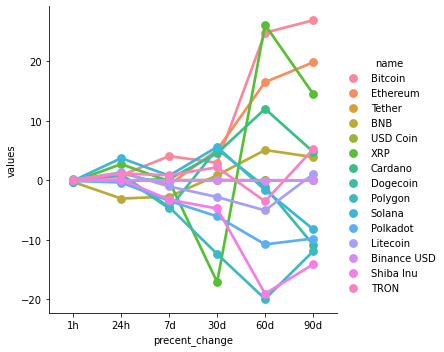

In [21]:
sns.catplot(x='precent_change', y='values', hue='name', data=df8, kind='point')